Dacon 영화 관객수 예측 모델 개발
=================================

title : 영화의 제목    
distributor : 배급사    
genre : 장르    
release_time : 개봉일    
time : 상영시간(분)    
screening_rat : 상영등급    
director : 감독이름    
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)    
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)    
num_staff : 스텝수    
num_actor : 주연배우수    
box_off_num : 관객수    

In [159]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
from matplotlib import font_manager, rc
rc('font',family=font_manager.FontProperties(fname='c:/windows/fonts/H2GTRM.TTF').get_name())
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import tensorflow as tf

In [52]:
train = pd.read_csv('c:/data/영화 관객수/movies_train.csv')
test = pd.read_csv('c:/data/영화 관객수/movies_test.csv')
submission = pd.read_csv('c:/data/영화 관객수/submission.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [13]:
train.isnull().sum() #dir_prev_bfnum : 관객수가 알려지지않은 경우 공란으로 있음

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [15]:
train.duplicated().sum() #중복된 항목 없음

0

In [17]:
train.nunique()

title             600
distributor       169
genre              12
release_time      330
time               86
screening_rat       4
director          472
dir_prev_bfnum    245
dir_prev_num        6
num_staff         296
num_actor          17
box_off_num       586
dtype: int64

In [20]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [21]:
test.duplicated().sum()

0

In [22]:
test.nunique()

title             243
distributor        93
genre              12
release_time      182
time               70
screening_rat       4
director          220
dir_prev_bfnum    103
dir_prev_num        7
num_staff         165
num_actor          14
dtype: int64

In [36]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [44]:
pd.options.display.float_format = '{:.1f}'.format

상관성 확인
--------------

<AxesSubplot:>

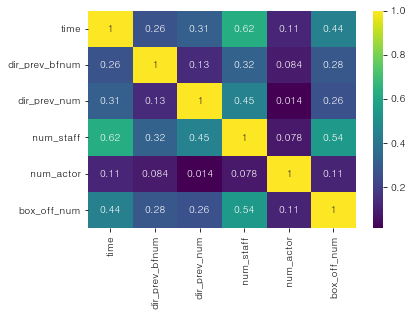

In [47]:
pd.reset_option('display.float_format')
sns.heatmap(abs(train.corr()),annot=True,cmap='viridis')

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

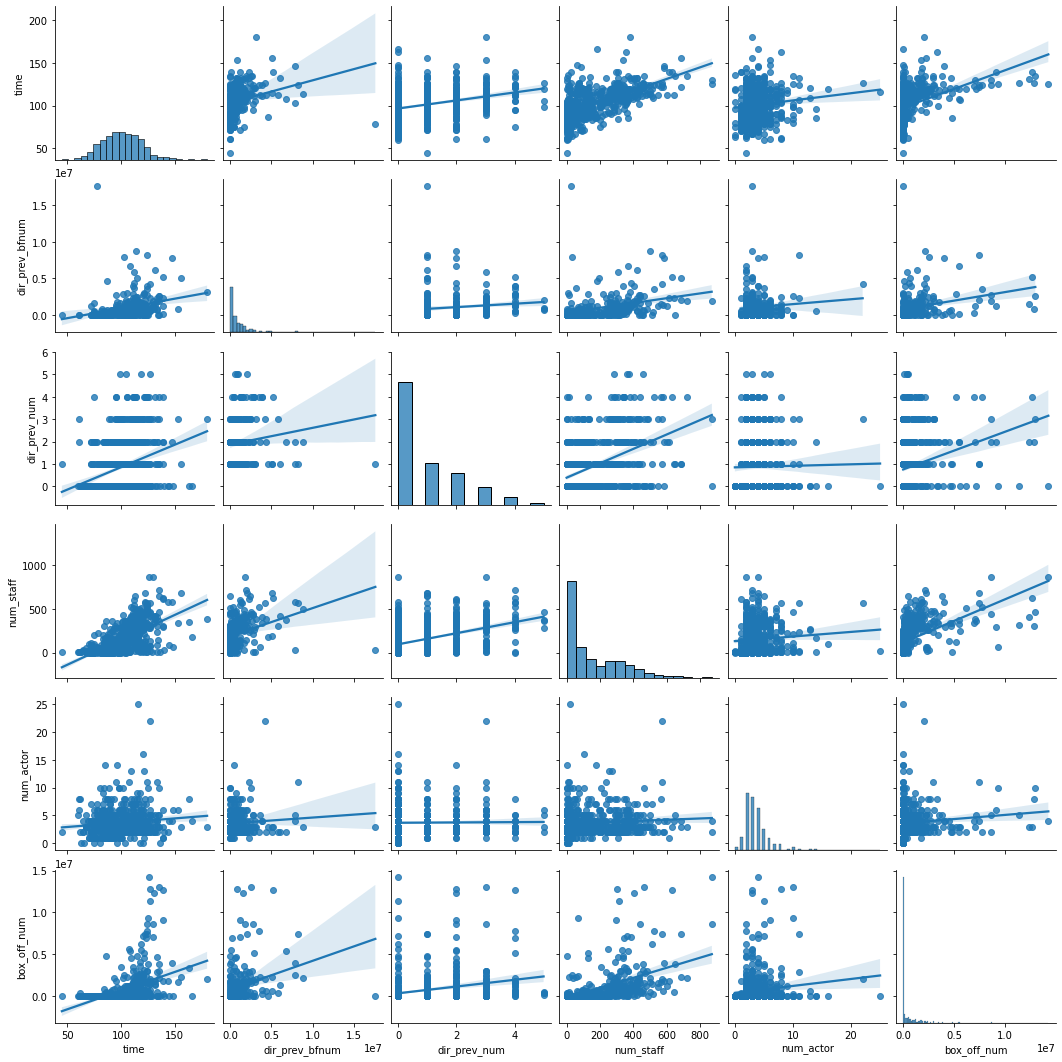

In [24]:
sns.pairplot(train,kind='reg')

관객수와 time, dir_prev_bfnum, dir_prev_num, num_staff, num_actor와 상관관계가 있지만, dir_prev_bfnum와 num_actor은 분산이 커 확인이 더 필요하다.

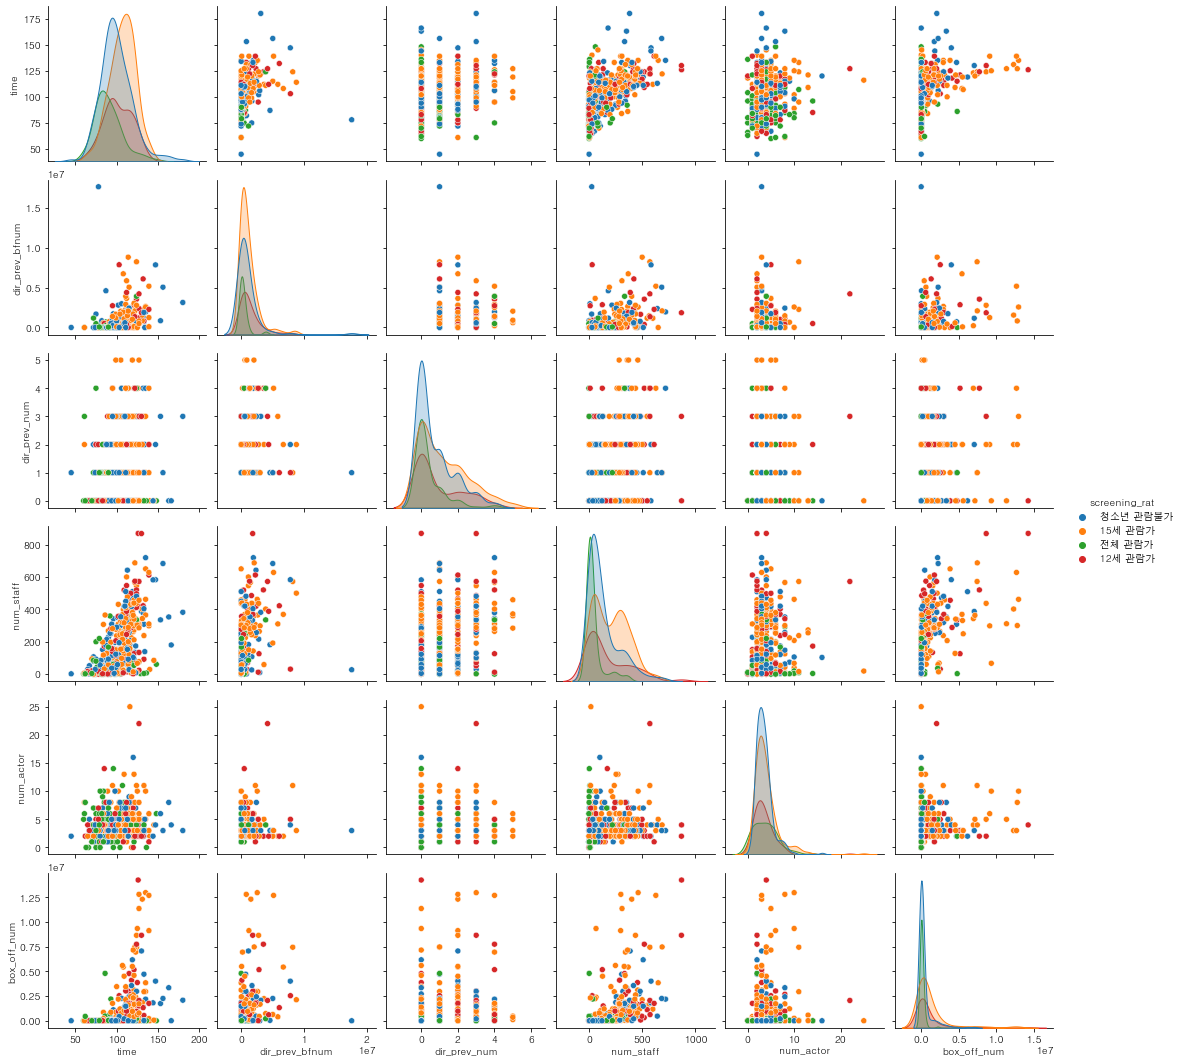

In [32]:
sns.pairplot(train,hue='screening_rat');

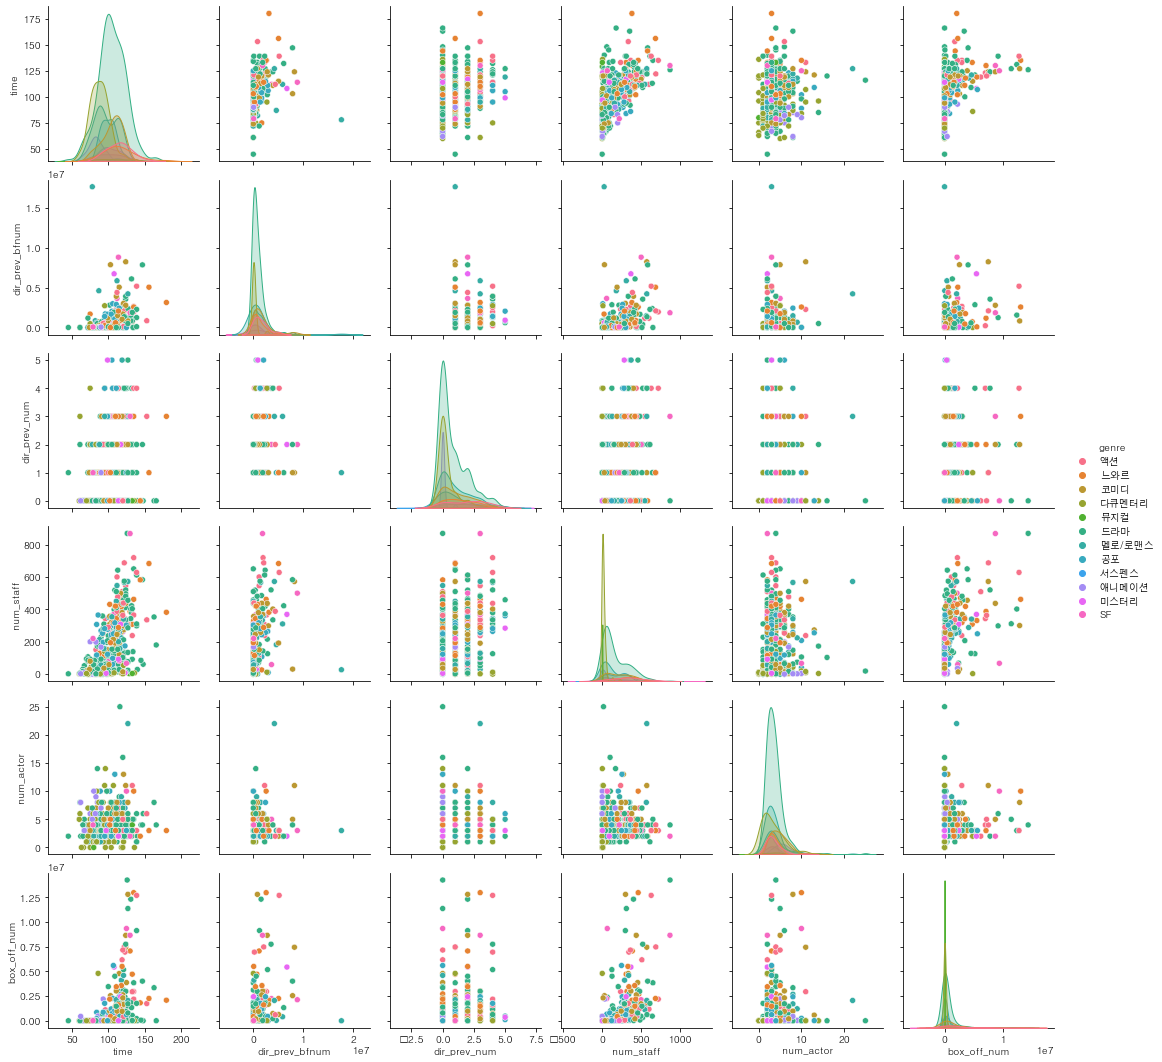

In [35]:
sns.pairplot(train,hue='genre')

title
------

In [9]:
len(train.title.unique())

600

distributor
-------

In [11]:
len(train.distributor.unique())

169

In [49]:
train.distributor.unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [56]:
train['distributor'] = train.distributor.str.replace("\(주\)", '')
test['distributor'] = test.distributor.str.replace("\(주\)", '')

In [69]:
train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor] #띄어쓰기 모두 제거
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]

In [72]:
sorted(train.distributor.unique())

['BoXoo엔터테인먼트',
 'CGV무비꼴라쥬',
 'CGV아트하우스',
 'CJCGV',
 'CJEMPictures',
 'CJEM영화부문',
 'CJ엔터테인먼트',
 'JK필름',
 'KBS미디어',
 'KT',
 'KTG상상마당',
 'M2픽처스',
 'NEW',
 'OAL올',
 'SBS콘텐츠허브',
 'SK텔레콤',
 'SK플래닛',
 'THE픽쳐스',
 'tvN',
 'ysfilm',
 '건시네마',
 '고구마공작소',
 '고앤고필름',
 '골든타이드픽처스',
 '김기덕필름',
 '나우콘텐츠',
 '나이너스엔터테인먼트',
 '노바엔터테인먼트',
 '노버스엔터테인먼트',
 '대명문화공장',
 '더피플',
 '더픽쳐스',
 '더픽쳐스마운틴픽쳐스',
 '동국대학교충무로영상제작센터',
 '두엔터테인먼트',
 '두타연',
 '드림로드',
 '드림팩트엔터테인먼트',
 '디마엔터테인먼트',
 '디씨드',
 '랠리버튼',
 '레인보우팩토리',
 '로드하우스',
 '롤러코스터프로덕션',
 '롯데엔터테인먼트',
 '리틀빅픽처스',
 '리틀빅픽쳐스',
 '마노엔터테인먼트',
 '마법사필름',
 '마운틴픽처스',
 '마운틴픽쳐스',
 '마인스엔터테인먼트',
 '머스트씨무비',
 '메가박스플러스엠',
 '무비꼴라쥬',
 '미디어데이',
 '미라클필름',
 '백두대간',
 '보람엔터테인먼트',
 '브릿지웍스',
 '사람과사람들',
 '상구네필름',
 '새인컴퍼니',
 '서울독립영화제',
 '쇼박스',
 '쇼박스미디어플렉스',
 '스마일이엔티',
 '스크린조이',
 '스토리셋',
 '스톰픽쳐스코리아',
 '스튜디오느림보',
 '스튜디오블루',
 '스튜디오후크',
 '스폰지',
 '스폰지이엔티',
 '시너지',
 '시네마달',
 '시네마서비스',
 '싸이더스',
 '싸이더스FNH',
 '씨너스엔터테인먼트',
 '씨네굿필름',
 '씨네그루키다리이엔티',
 '씨엠닉스',
 '아방가르드필름',
 '아우라픽처스',
 '아이필름코퍼레이션',
 '액티버스엔터테인먼트',
 '어뮤즈',
 

In [73]:
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    elif '더픽쳐스' in x :
        return '더픽쳐스'
    else :
        return x

In [76]:
train.distributor = train.distributor.apply(get_dis)
test.distributor = test.distributor.apply(get_dis)

In [46]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [78]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [80]:
train.genre_rank.unique()

array([11, 12,  9,  2,  1,  8,  5,  7,  3,  4,  6, 10], dtype=int64)

In [84]:
tr_nm_rank = train.groupby('distributor').box_off_num.median().reset_index(name='num_rank').sort_values(by='num_rank')
tr_nm_rank

,distributor,num_rank
109,인피니티엔터테인먼트,2.0
15,고구마공작소,8.0
51,사람과사람들,42.0
96,위드시네마,46.0
19,나우콘텐츠,54.0
...,...,...
111,전망좋은영화사,1214237.0
104,이십세기폭스코리아,1422844.0
55,쇼박스,2138560.0
83,영구아트무비,2541603.0


In [89]:
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]

데이터 병합
----------------

In [91]:
train = pd.merge(train,tr_nm_rank,how='left')
test = pd.merge(test,tr_nm_rank,how='left')

In [95]:
test.num_rank.fillna(0,inplace=True)

In [92]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
genre_rank          0
num_rank            0
dtype: int64

In [96]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
genre_rank          0
num_rank            0
dtype: int64

In [107]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from ngboost import NGBRegressor

모델링 데이터 구성
------------------------
* 타겟 값인 관객수를 로그변환
* 상영등급은 더미 변수
* 출연 배우 수는 로그변환

In [112]:
X = train[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
y = np.log1p(train.box_off_num)

In [114]:
X = pd.get_dummies(columns = ['screening_rat'], data = X)

<AxesSubplot:xlabel='num_actor', ylabel='Density'>

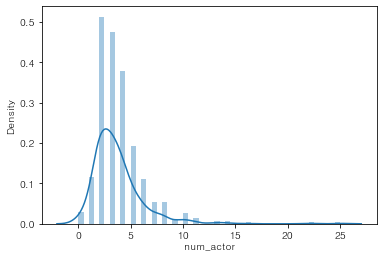

In [116]:
sns.distplot(X['num_actor']) #왜도가 높아 log 변환해줌

In [121]:
X['num_actor'] = np.log1p(X['num_actor'])

<AxesSubplot:xlabel='num_actor', ylabel='Density'>

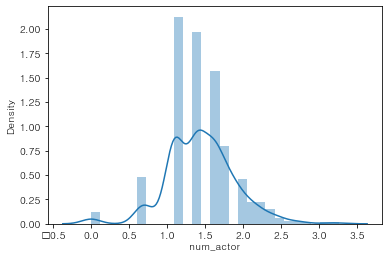

In [122]:
sns.distplot(X['num_actor']) #왜도 해결됨.

test 데이터도 변환
------------------

In [126]:
target = test[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]

In [127]:
target = pd.get_dummies(columns = ['screening_rat'], data = target)

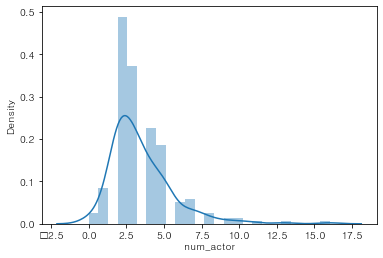

In [131]:
sns.distplot(target['num_actor']);

In [132]:
target['num_actor'] = np.log1p(target['num_actor'])

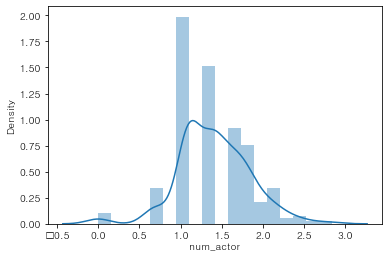

In [133]:
sns.distplot(target['num_actor']);

### k-fold로 교차검증 (10fold)

In [134]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

### 5가지 모델 사용
#### 1) GradientBoostingRegressor

In [135]:
gbm = GradientBoostingRegressor(random_state=42)

In [176]:
rmse_list =[]
gb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X,y): #tr_idx : x.shape[0]이(600) kf수만큼(10) 반복
    tr_x,tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x,val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    gbm.fit(tr_x,tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)]) #relu 함수와 동일(관객수는 0보다 크기때문에 0보다 작으면 0처리)
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(target)]) #relu 함수와 동일
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    gb_pred += (sub_pred / 10)
    
np.mean(rmse_list)

1174378.9765191542

#### 2)NGBRegressor

In [172]:
ngb = NGBRegressor(random_state=42)

In [177]:
rmse_list=[]
ngb_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in kf.split(X,y):
    tr_x,tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x,val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    ngb.fit(tr_x,tr_y)
    
    pred = np.expm1(tf.nn.relu(ngb.predict(val_x)))
    sub_pred = np.expm1(tf.nn.relu(ngb.predict(target)))
    rmse = np.sqrt(mean_squared_error(val_y,pred))
    
    rmse_list.append(rmse)
    ngb_pred += (sub_pred/10)
        
np.mean(rmse_list) 

[iter 0] loss=0.7640 val_loss=0.0000 scale=1.0000 norm=0.7374
[iter 100] loss=0.7413 val_loss=0.0000 scale=0.2500 norm=0.1821
[iter 200] loss=0.7373 val_loss=0.0000 scale=0.0312 norm=0.0227
[iter 300] loss=0.7364 val_loss=0.0000 scale=0.0078 norm=0.0057
[iter 400] loss=0.7352 val_loss=0.0000 scale=0.0010 norm=0.0007
[iter 0] loss=0.7489 val_loss=0.0000 scale=0.5000 norm=0.3675
[iter 100] loss=0.7342 val_loss=0.0000 scale=1.0000 norm=0.7231
[iter 200] loss=0.7165 val_loss=0.0000 scale=0.5000 norm=0.3569
[iter 300] loss=0.7030 val_loss=0.0000 scale=0.5000 norm=0.3528
[iter 400] loss=0.6951 val_loss=0.0000 scale=0.5000 norm=0.3502
[iter 0] loss=0.7089 val_loss=0.0000 scale=0.5000 norm=0.3584
[iter 100] loss=0.6848 val_loss=0.0000 scale=0.5000 norm=0.3503
[iter 200] loss=0.6732 val_loss=0.0000 scale=0.5000 norm=0.3465
[iter 300] loss=0.6660 val_loss=0.0000 scale=0.5000 norm=0.3446
[iter 400] loss=0.6592 val_loss=0.0000 scale=0.0010 norm=0.0007
[iter 0] loss=0.6908 val_loss=0.0000 scale=0.5

1510861.4371571392

#### 3) LGBMRegressor

In [183]:
lgbm = LGBMRegressor(random_state = 518)

In [184]:
rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X,y):
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)
    
np.mean(rmse_list)

1213815.0440528719

#### 4) XGBRegressor

In [185]:
xgb = XGBRegressor(random_state = 518)

In [186]:
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)
np.mean(rmse_list)

1437735.1546705803

#### 5) RandomForestRegressor

In [187]:
rf = RandomForestRegressor(random_state = 518)

In [188]:
rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)
    
np.mean(rmse_list)

872738.262092494

#### 최종 예측 결과 블렌딩

In [190]:
submission['box_off_num'] = (xgb_pred  + lgb_pred + rf_pred + gb_pred + ngb_pred) / 5

In [191]:
submission.sort_values(by = 'box_off_num')

,title,box_off_num
130,댄서김의 은밀한 교수법,1.346973e+01
39,REC 알이씨,1.582966e+01
139,화려한 외출,2.197289e+01
173,옹녀뎐,2.237921e+01
7,이웃집 남자,2.906127e+01
...,...,...
229,베테랑,4.388225e+06
61,수상한 고객들,4.427038e+06
142,박수건달,5.955998e+06
179,군도: 민란의 시대,6.395393e+06
